<a href="https://colab.research.google.com/github/niharali/GenAI2025/blob/main/Multi_Layer_Ann_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Generating synthetic data (car features and prices for simplicity)
np.random.seed(42)
# Features: [Engine size (liters), Fuel efficiency (mpg), Age (years), Mileage (miles)]
X = np.random.rand(1000, 4) * [4, 50, 10, 200000]  # 1000 samples, 4 features
# Target: Car prices (e.g., in USD)
y = (X[:, 0] * 15000 + X[:, 1] * 200 + X[:, 2] * -500 + X[:, 3] * -0.1 + 20000) + np.random.randn(1000) * 1000

In [3]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardizing the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Building the Multi-Layer ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer 1
model.add(Dense(32, activation='relu'))  # Hidden layer 2
model.add(Dense(1, activation='linear'))  # Output layer for regression

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compiling the model with Mean Squared Error (MSE) as the loss function
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [7]:
# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 2191964672.0000 - mean_absolute_error: 43030.4922 - val_loss: 2271973888.0000 - val_mean_absolute_error: 43873.9883
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2247172864.0000 - mean_absolute_error: 43658.4141 - val_loss: 2271898624.0000 - val_mean_absolute_error: 43873.1523
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2143271168.0000 - mean_absolute_error: 42457.6172 - val_loss: 2271785728.0000 - val_mean_absolute_error: 43871.9141
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2235320320.0000 - mean_absolute_error: 43235.0664 - val_loss: 2271600128.0000 - val_mean_absolute_error: 43869.9297
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2132399104.0000 - mean_absolute_error: 42142.1406 - val_loss: 2271304704.0000 - val_mean_absolute_error: 43866.8008
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2053187328.0000 - mean_absolute_error: 41182.7734 - val_loss: 227085158

In [8]:
# Evaluating the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Data: ${mae:.2f}")

Mean Absolute Error on Test Data: $35366.84


In [9]:
# Predicting on new data
new_data = np.array([[3.0, 25.0, 5.0, 60000]])  # Example input: Engine size, fuel efficiency, age, mileage
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print(f"Predicted Car Price: ${prediction[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Car Price: $12590.89


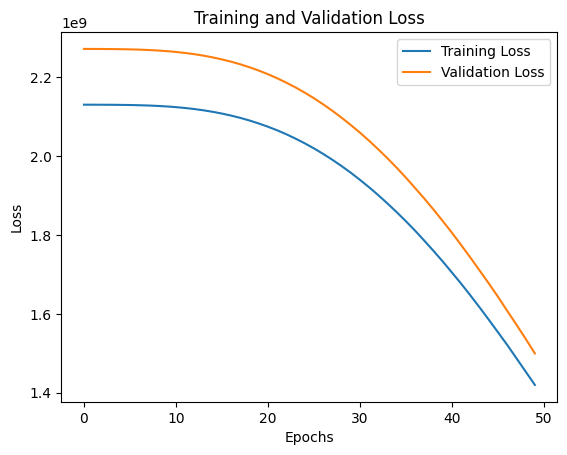

In [10]:
# Plotting the training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()